In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
df = pd.read_csv('yelp.csv')

In [78]:
df.shape

(10000, 10)

In [79]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [82]:
df['textLength'] = df['text'].apply(len)

In [83]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,textLength
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


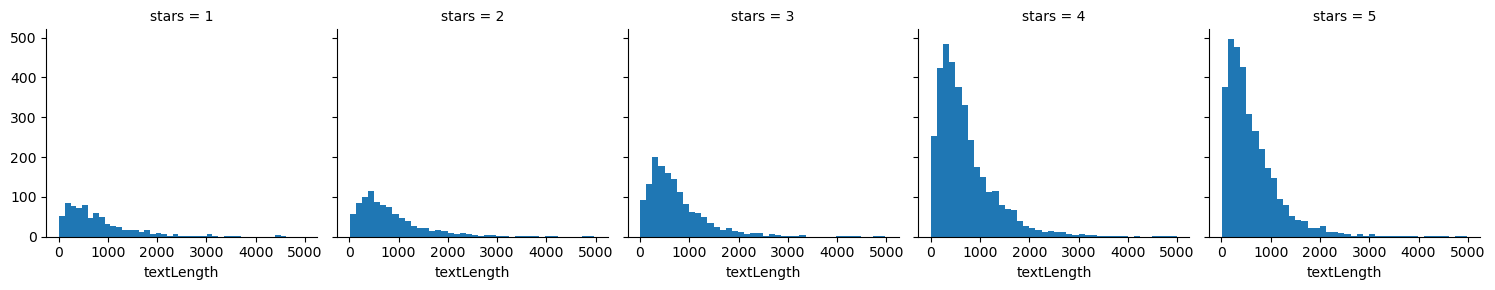

In [84]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'textLength',bins=40)

<Axes: xlabel='stars', ylabel='textLength'>

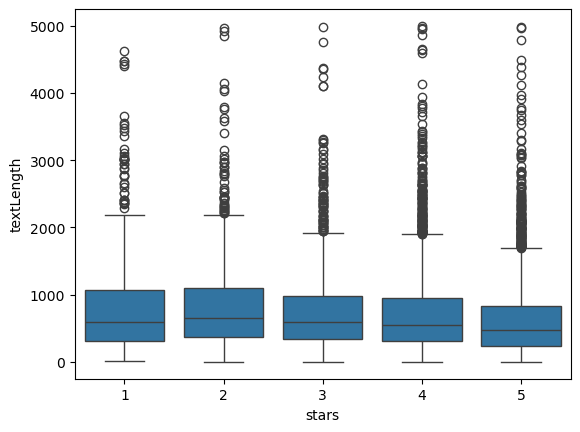

In [85]:
sns.boxplot(x='stars',y='textLength',data = df)

<Axes: xlabel='stars', ylabel='count'>

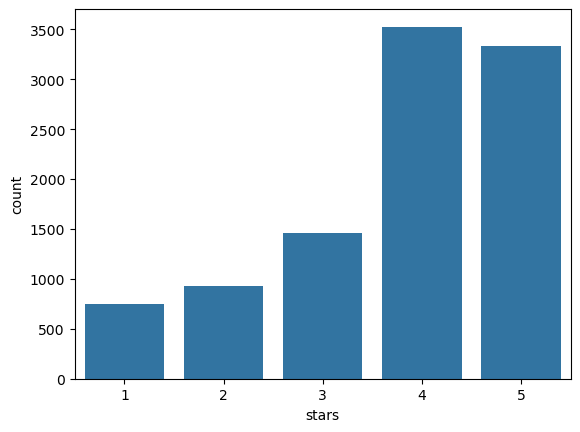

In [86]:
sns.countplot(x='stars',data=df)

In [87]:
starsGb = df.groupby(df['stars']).mean(numeric_only=True)
starsGb

,cool,useful,funny,textLength
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [88]:
starsCo = starsGb.corr()

In [89]:
starsCo

,cool,useful,funny,textLength
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
textLength,-0.857664,0.699881,0.843461,1.000000


In [90]:
#pip install seaborn --upgrade

<Axes: >

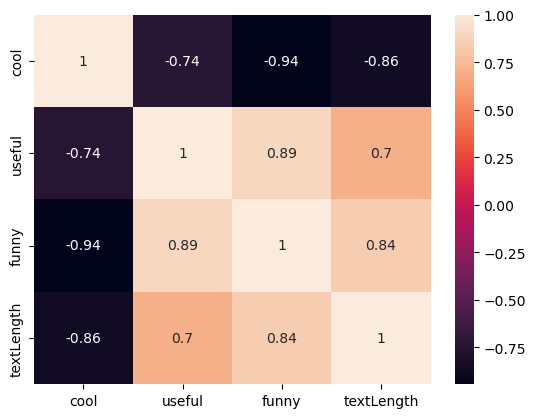

In [91]:
sns.heatmap(starsCo, annot=True)

In [92]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
stop = stopwords.words('english')
from wordcloud import WordCloud

In [93]:
yelp_class = df[(df.stars==1) | (df.stars==5)]

In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [95]:
def customPreprocess(text):
    #Lowerase text
    text = text.lower()
    #Remove all special character
    cleanedText = re.sub(r'[^A-Za-z]',' ',text)
    #Lemmatize the text
    words = cleanedText.split()
    words = [word for word in words if word not in stop]
    lemmatizer = WordNetLemmatizer()
    lemmWords = [lemmatizer.lemmatize(word) for word in words]
    #convert to string
    cleanedText = ' '.join(lemmWords)
    return cleanedText

In [96]:
oneStar = ' '.join(yelp_class[yelp_class.stars==1]['text'])
fiveStar = ' '.join(yelp_class[yelp_class.stars==5]['text'])

In [97]:
oneClean = customPreprocess(oneStar)

In [98]:
fiveClean = customPreprocess(fiveStar)

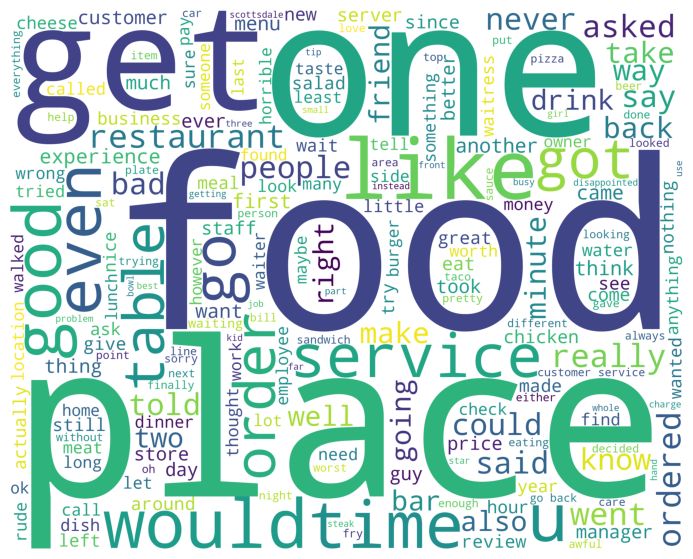

In [99]:
wordcloud = WordCloud(stopwords=stop,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(oneClean)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

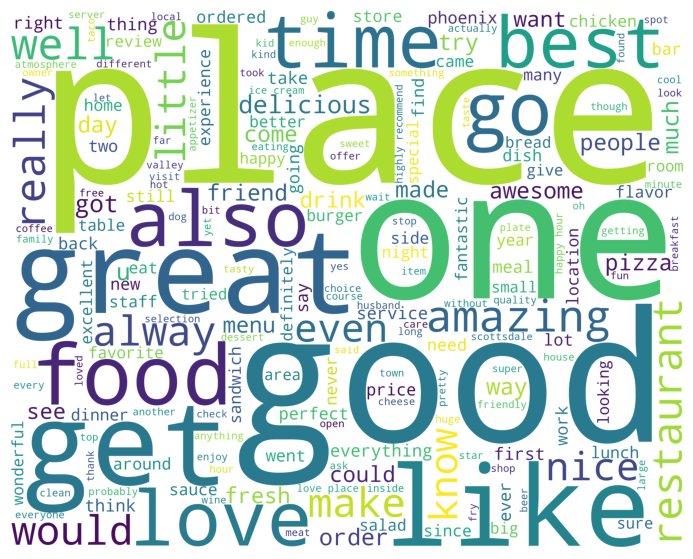

In [100]:
wordcloud = WordCloud(stopwords=stop,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(fiveClean)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [112]:
X = yelp_class['text']
y = yelp_class['stars']

In [113]:
cv = CountVectorizer(stop_words='english',ngram_range=(1,3), preprocessor=customPreprocess)
X = cv.fit_transform(X).toarray()

In [114]:
df = pd.DataFrame(X,columns=cv.get_feature_names_out())

In [117]:
X.dtype

dtype('int64')

In [119]:
from sklearn.model_selection import train_test_split

In [122]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

In [123]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [124]:
nb.fit(X_train,y_train)

MultinomialNB()

In [125]:
predictions = nb.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix,classification_report

In [127]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[127  23]
 [ 70 598]]


              precision    recall  f1-score   support

           1       0.64      0.85      0.73       150
           5       0.96      0.90      0.93       668

    accuracy                           0.89       818
   macro avg       0.80      0.87      0.83       818
weighted avg       0.90      0.89      0.89       818



In [136]:
cm = confusion_matrix(y_test,predictions,labels=labels)

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

In [130]:
disp = ConfusionMatrixDisplay(cm)

[[127  23]
 [ 70 598]]


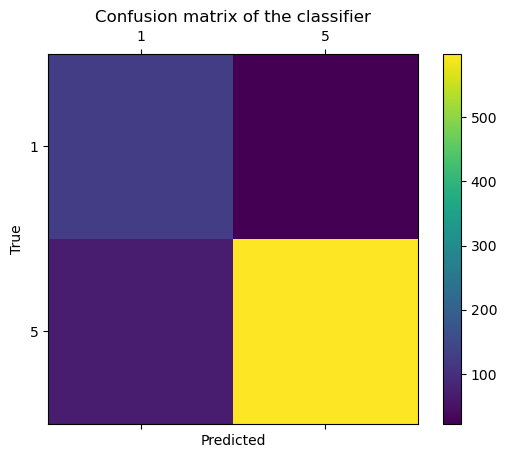

In [140]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

To improve the accuracy of my Multinomial Naive Bayes model, we can start by enhancing feature engineering. Handling imbalanced data is crucial; we can use techniques like oversampling the minority class to ensure the model learns from all classes effectively. Lastly, hyperparameter tuning using methods like grid search can optimize model performance by finding the best parameter values.